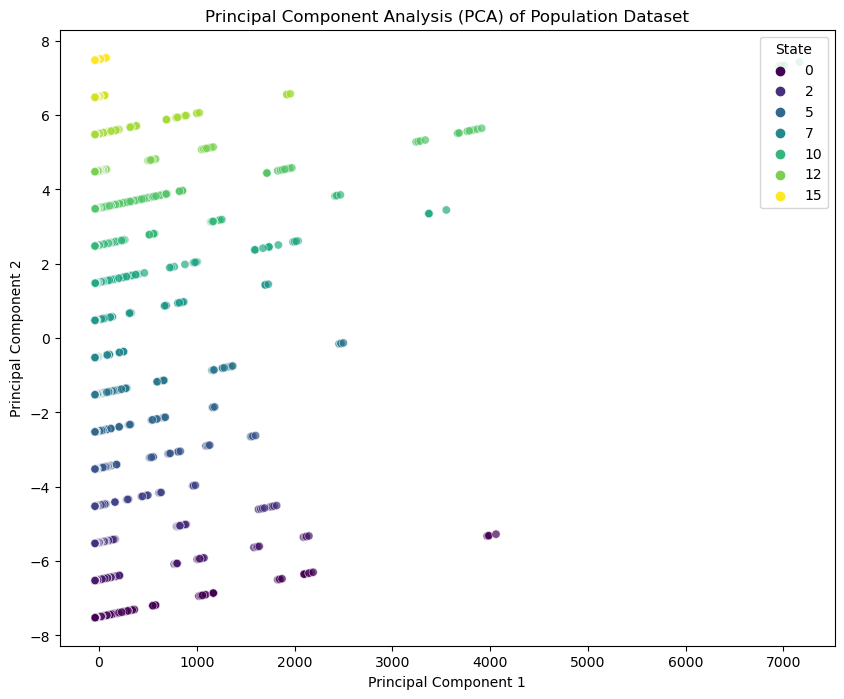

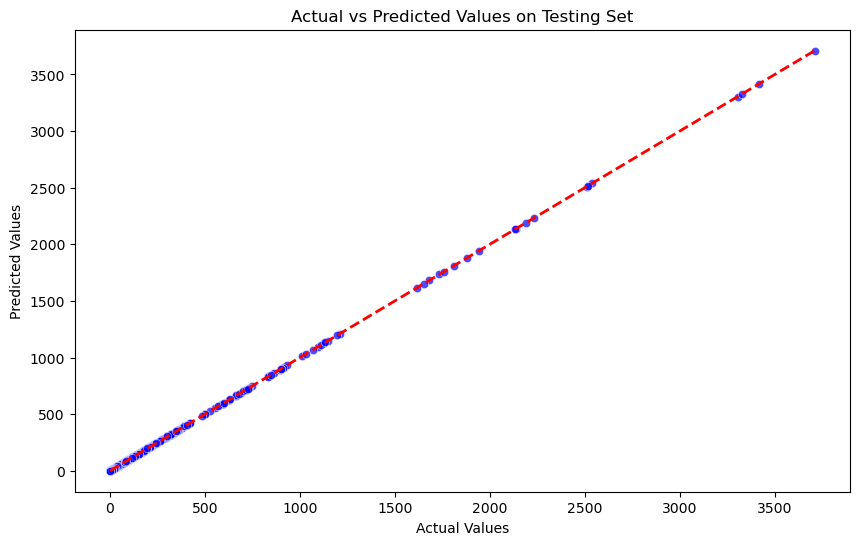

Mean Squared Error: 7.894638552912743e-26
Coefficients: [9.99999850e-01 5.48140925e-04]


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    return df

def convert_to_numerical(df):
    # Use LabelEncoder to convert categorical variables to numerical
    label_encoder = LabelEncoder()
    df['state'] = label_encoder.fit_transform(df['state'])
    df['ethnicity'] = label_encoder.fit_transform(df['ethnicity'])
    df['age'] = label_encoder.fit_transform(df['age'])
    df['sex'] = label_encoder.fit_transform(df['sex'])
    return df

def visualize_with_pca(df):
    # Apply PCA for visualization
    features = ['state', 'population']
    X = df[features].values

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Add PCA results to the original dataset
    df_with_pca = pd.concat([df, principal_df], axis=1)

    # Visualize the data
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=df['state'], palette='viridis', alpha=0.7)
    plt.title('Principal Component Analysis (PCA) of Population Dataset')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='State', loc='upper right')
    plt.show()

    return df_with_pca

def linear_regression(df_with_pca):
    # Divide the dataset into features (X) and target variable (y)
    X = df_with_pca[['PC1', 'PC2']]
    y = df_with_pca['population']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Scatter plot of actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
    plt.title('Actual vs Predicted Values on Testing Set')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Add a diagonal line for reference
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.show()

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    coefficients = model.coef_
    print(f'Coefficients: {coefficients}')

# Main Code
file_path = 'population_state.csv'
df = load_dataset(file_path)
df = convert_to_numerical(df)
df_with_pca = visualize_with_pca(df)
linear_regression(df_with_pca)
